In [1]:
###Folders

Input_folder = 'C:/Users/moham/team_mouse Dropbox/Mohamady El-Gaby/Taskspace_abstraction/Data/Intermediate_objects/'
Output_folder = 'C:/Users/moham/team_mouse Dropbox/Mohamady El-Gaby/Taskspace_abstraction/Results/Ephys/'


'Download data from:  https://doi.org/10.17605/OSF.IO/3D9R2'

'Download data from:  https://doi.org/10.17605/OSF.IO/3D9R2'

In [2]:
##Importing libraries
#%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d    
from joblib import dump, load
import os, sys, pickle, time, re, csv
from collections import defaultdict#

import numpy as np
import pandas as pd

import scipy.stats as st
#import pycircstat as circ_st
import math

import matplotlib.pyplot as plt
import seaborn as sns
import collections, numpy

from itertools import groupby
#from pingouin import partial_corr
from collections import Counter
import random
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from scipy.stats import circmean
from scipy.ndimage import gaussian_filter1d
import warnings
import scipy as sp

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

from matplotlib.colors import LinearSegmentedColormap


In [20]:
from collections import defaultdict
def rec_dd():
    return defaultdict(rec_dd)

def remove_empty(xx):

    yy= [x for x in xx if len(x) > 0]
    return(yy)


##convert nested dict into array
def dict_to_array(d):
    dictlist=[]
    for key, value in d.items():
        dictlist.append(value)
    return(np.asarray(dictlist))

def rank_repeat(a):
    arr=np.zeros(len(a))
    for n in np.unique(a):
        count=0
        for ii in range(len(a)):
            if a[ii]==n:
                arr[ii]=count
                count+=1

    arr=arr.astype(int)
    return(arr)

def concatenate_complex2(xx):

    ALL_elements=[]
    for ii in np.arange(len(xx)):
        xxii=xx[ii]
        for jj in np.arange(len(xxii)):
            xxiijj=xxii[jj]
            ALL_elements.append(np.asarray(xxiijj))
            
    return(np.asarray(ALL_elements))

def smooth_circular(x,sigma=10):
    return(gaussian_filter1d(np.hstack((x,x,x)),sigma,axis=0)[len(x):int(len(x)*2)])

def polar_plot_stateX2(meanx,upperx,lowerx,ax,repeated,color='black',labels='states',plot_type='line',Marker=False,\
                      fields_booleanx=[], structure_abstract='ABCD',fontsize=20,set_max=False,max_val=1):
    rx = list(meanx)
    theta = list(range(len(rx)))
    thetax = [2 * np.pi * (x/len(rx)) for x in theta]
    r = rx + [rx[0]]
    theta = thetax + [thetax[0]]
    
    #ax=plt.subplot(111, projection='polar')
    
    if Marker==True:
        fields_booleanx=fields_booleanx*(np.max(upperx)+0.1*np.max(upperx))
        fields_boolean=list(fields_booleanx)+[list(fields_booleanx)[0]]

    upper=list(upperx)+[list(upperx)[0]]
    lower=list(lowerx)+[list(lowerx)[0]]
    
    if plot_type=='line':
        ax.plot(theta, r,color=color)
        ax.fill_between(theta, upper, lower, alpha=0.2,color=color)
        if set_max==False:
            ax.set_rmax(np.max(upper)+0.01*np.max(upper))
        else:
            ax.set_rmax(max_val)
            
        if Marker==True:
            ax.plot(theta, fields_boolean,color='black',linestyle='None',marker='.')

    elif plot_type=='bar':
        ax.bar(theta,r,width=5/len(r),color=color)
    elif plot_type=='marker':
        ax.plot(theta, r,color=color)
        
    
    ax.grid(True)
    #ax.set_rorigin(-1)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    if labels=='states':
        if structure_abstract=='ABCD':
            ax.set_xticklabels(['A', '', 'B', '', 'C', '', 'D', ''],fontsize=fontsize)
        elif structure_abstract=='AB' and repeated==False:
            ax.set_xticklabels(['A', '', '', '', 'B', '', '', ''],fontsize=fontsize)
        elif structure_abstract=='AB' and repeated==True:
            ax.set_xticklabels(['A', '', 'B', '', 'A', '', 'B', ''],fontsize=fontsize)
    elif labels == 'angles':
        ax.set_xticklabels(['0', '', '90', '', '180', '', '270', ''],fontsize=fontsize)

def noplot_timecourseBx(x,y,color):
    ymean=mean_complex2(y)
    yerr=[st.sem(i,nan_policy='omit') for i in y]
    plt.errorbar(x,y=ymean, color=color, marker='o')
    plt.fill_between(x, ymean-yerr, ymean+yerr, color=color,alpha=0.5)
        
def indep_roll(arr, shifts, axis=1):
    """Apply an independent roll for each dimensions of a single axis.

    Parameters
    ----------
    arr : np.ndarray
        Array of any shape.

    shifts : np.ndarray
        How many shifting to use for each dimension. Shape: `(arr.shape[axis],)`.

    axis : int
        Axis along which elements are shifted. 
    """
    arr = np.swapaxes(arr,axis,-1)
    all_idcs = np.ogrid[[slice(0,n) for n in arr.shape]]

    # Convert to a positive shift
    shifts[shifts < 0] += arr.shape[-1] 
    all_idcs[-1] = all_idcs[-1] - shifts[:, np.newaxis]

    result = arr[tuple(all_idcs)]
    arr = np.swapaxes(result,-1,axis)
    return arr 

def bar_plotX(y,name,ymin,ymax,points,pairing,jitt):
    leny=len(y)
    plt.figure(figsize=(leny*(3/2),6))
    
    if ymin =='auto':
        ymin=np.min(np.concatenate(y))
    if ymax =='auto':
        ymax=np.max(np.concatenate(y))
    
    ##bars
    y_mean=((np.zeros(len(y))))
    y_sem=((np.zeros(len(y))))
    for ii in range(0, len(y)):
        ymeanx=np.nanmean(y[ii])
        y_mean[ii]=ymeanx
        ysemx=st.sem(y[ii], nan_policy='omit')
        y_sem[ii]=ysemx
   
    
    xxx=np.linspace(0.15, 0.2+(0.2*(leny-1)), leny)

    xlocations = np.array(range(len(xxx)))
    width=0.2
    plt.bar(xxx, y_mean, width, yerr=y_sem, alpha=1, 
           error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2), align='center')
    
    if points != 'points' and ymin == 'auto':
        ymin=np.min(y_mean-y_sem) #-np.max(y_sem)
        ymax=np.max(y_mean+y_sem) #+np.max(y_sem)
    
    #if ymin>0:
    #    ymin=0
    plt.ylim(ymin-(0.05*(ymax-ymin)),ymax+(0.05*(ymax-ymin)))
    plt.xlim(0,np.max(xxx)+0.15)
    
    

    ###points and lines
    if points == 'points':
        yyALL=[]
        for ii in range(0, len(y)):
            yy=np.column_stack((y[ii],np.repeat(xxx[ii],len(y[ii]))))
            yyALL.append(yy)

        xy=np.vstack((yyALL))
        jittered=rand_jitterX(xy[:,1],jitt)

        if pairing == 'paired':
            for ii in range(0, leny):
                x1=np.split(jittered,len(y))[ii]
                if ii == 0:
                    x1_all=x1
                else:
                    x1_all=np.column_stack((x1_all,x1))

            for jj in range(0,np.shape(y)[1]):
                yyyy=np.asarray(y)[:,jj]
                plt.plot(x1_all[jj],yyyy, color='gray')
        plt.plot(jittered,xy[:,0],'o',markersize=7,color='white',markeredgecolor='black')
    
    if name != 'none':
        plt.savefig(name)
    
    #plt.show()

###function to plot scatter plots (e.g. comparing assembly strength at correct vs incorrect dispensers)
def plot_scatter(x,y,name='none'):
    plt.plot(x, y, 'o')
    z= [-10000, 0, 10000]
    plt.plot(z,z,'k--')

    xy=np.hstack((x,y))

    xmin=min(xy)-np.mean(xy)*0.1
    xmax=max(xy)+np.mean(xy)*0.1
    ymin=min(xy)-np.mean(xy)*0.1
    ymax=max(xy)+np.mean(xy)*0.1

    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    
    plt.gca().set_aspect('equal', adjustable='box')
    
    if name != 'none':
        plt.savefig(name)
    plt.show()
    

    
def circular_sem(a):
    if len(np.shape(a))==2:
        sem_=np.rad2deg(np.hstack(([st.circvar(remove_nan(a[:,ii]))/np.sqrt(len(remove_nan(a[:,ii])))\
                               for ii in range(len(a.T))])))
    elif len(np.shape(a))==1:
        sem_=np.rad2deg(st.circvar(remove_nan(a))/np.sqrt(len(remove_nan(a))))
        
    return(sem_)
    
def non_repeat_ses_maker(mouse_recday):
    Tasks=np.load(Input_folder+'Task_data_'+mouse_recday+'.npy',allow_pickle=True)
    num_trials_day=np.load(Input_folder+'Num_trials_'+mouse_recday+'.npy',\
                                        allow_pickle=True)

    non_repeat_bool_all=[]
    for ses_ind in np.arange(len(Tasks)):
        if ses_ind==0:
            non_repeat_bool=True
        else:
            num_prev_repeats=np.sum([np.array_equal(Tasks[ses_ind],Tasks[:ses_ind][jj])\
                                     for jj in range(len(Tasks[:ses_ind]))])
            if num_prev_repeats==0:
                non_repeat_bool=True
            else:
                non_repeat_bool=False

        non_repeat_bool_all.append(non_repeat_bool)
    non_repeat_bool_all=np.hstack((non_repeat_bool_all))
    num_trials_bool=num_trials_day>0
    non_repeat_ses_bool=np.logical_and(non_repeat_bool_all,num_trials_bool)

    non_repeat_ses=np.where(non_repeat_ses_bool==True)[0]
    return(non_repeat_ses)

def two_proportions_test(success_a, size_a, success_b, size_b):
    """
    A/B test for two proportions;
    given a success a trial size of group A and B compute
    its zscore and pvalue
    
    Parameters
    ----------
    success_a, success_b : int
        Number of successes in each group
        
    size_a, size_b : int
        Size, or number of observations in each group
    
    Returns
    -------
    zscore : float
        test statistic for the two proportion z-test

    pvalue : float
        p-value for the two proportion z-test
    """
    prop_a = success_a / size_a
    prop_b = success_b / size_b
    prop_pooled = (success_a + success_b) / (size_a + size_b)
    var = prop_pooled * (1 - prop_pooled) * (1 / size_a + 1 / size_b)
    zscore = np.abs(prop_b - prop_a) / np.sqrt(var)
    one_side = 1 - stats.norm(loc = 0, scale = 1).cdf(zscore)
    pvalue = one_side * 2
    return zscore, pvalue

def partition(alist, indices):
    return np.asarray([np.asarray(alist[i:j]) for i, j in zip(indices[:-1], indices[1:])])

def normalise(xx,num_bins=90,take_max=False):
    lenxx=len(xx)
    if lenxx<num_bins:
        xx=np.repeat(xx,10)/10
        lenxx=lenxx*10
    indices_polar=np.arange(lenxx)
    if take_max==True:
        normalized_xx=st.binned_statistic(indices_polar,xx, 'max', bins=num_bins)[0]
    else:
        normalized_xx=st.binned_statistic(indices_polar,xx, 'mean', bins=num_bins)[0]
    return(normalized_xx)

def raw_to_norm(raw_neuron,Trial_times_conc,num_states=4,return_mean=True,smoothing=True,\
                take_max=False,smoothing_sigma=10):
    raw_neuron_split=remove_empty(partition(list(raw_neuron),list(Trial_times_conc)))
    if len(raw_neuron_split)%num_states!=0:
        raw_neuron_split=raw_neuron_split[:len(raw_neuron_split)-len(raw_neuron_split)%num_states]
    
    if take_max==True:
        raw_neuron_split_norm=np.asarray([normalise(raw_neuron_split[ii],take_max=True)\
                                          for ii in np.arange(len(raw_neuron_split))])
    else:
        raw_neuron_split_norm=np.asarray([normalise(raw_neuron_split[ii]) for ii in np.arange(len(raw_neuron_split))])
    
    Actual_norm=(raw_neuron_split_norm.reshape(len(raw_neuron_split_norm)//num_states,\
                                               len(raw_neuron_split_norm[0])*num_states))
    
    if return_mean==True:
        Actual_norm_mean=np.nanmean(Actual_norm,axis=0)
        if smoothing==True:
            Actual_norm_smoothed=smooth_circular(Actual_norm_mean,sigma=smoothing_sigma)
            return(Actual_norm_smoothed)
        else:
            return(Actual_norm_mean)
    else:
        return(Actual_norm)
    
def remove_nan(x):
    x=x[~np.isnan(x)]
    return(x)

def unique_nosort(a):
    indexes = np.unique(a, return_index=True)[1]
    return(np.asarray([a[index] for index in sorted(indexes)]))

def one_hot_encode(x,length):
    array=np.zeros((len(x),length))
    for entry in np.arange(len(x)):
        if ~np.isnan(x[entry]):
            array[entry,int(x[entry])]=1
    return(array)

def data_matrix(data, concatenate=False):
    data_mat=np.asarray([data[ii][:len(data[-1])] for ii in range (len(data))])
    if concatenate==True:
        data_mat=np.concatenate(np.hstack(data_mat))
    return(data_mat)

###counts num of repeats for each stretch of numbers
def rank_repeat2(a):
    num_repeats=number_of_repeats(a)
    arr=[]
    for n_ind, n in enumerate(unique_adjacent(a)):
        count=0
        indices=np.arange(num_repeats[n_ind])
        arr.append(indices)
    arr=np.concatenate(arr)
    arr=arr.astype(int)
    return(arr)

def number_of_repeats(array):
    return(np.asarray([sum(1 for _ in group) for _, group in groupby(array)]))

def unique_adjacent(a):
    return(np.asarray([k for k,g in groupby(a)]))

def matrix_triangle(a,direction='upper',return_indices=False):
    if direction=='upper':
        indices=np.triu_indices(len(a), k = 1)
    if direction=='lower':
        indices=np.tril_indices(len(a), k = -1)
    triangle=a[indices]
    if return_indices==True:
        return(triangle,indices)
    else:
        return(triangle)
    
    
def edge_node_fill(edge_mat,node_mat):
    new_mat=np.copy(edge_mat)
    for ii in [0,2,4]:
        new_mat[ii,0]=node_mat[int(ii/2),0]
        new_mat[ii,2]=node_mat[int(ii/2),1]
        new_mat[ii,4]=node_mat[int(ii/2),2]
        
    return(new_mat)

def _nanargmin(arr, axis=0):
    try:
        if len(np.shape(arr))==1:
            return np.nanargmin(arr)
        else:
            return np.nanargmin(arr, axis)
    except ValueError:
        return np.nan
    
def _nanargmax(arr, axis=0):
    try:
        if len(np.shape(arr))==1:
            return np.nanargmax(arr)
        else:
            return np.nanargmax(arr, axis)
    except ValueError:
        return np.nan

from collections import Counter
from itertools import combinations
def most_common_pair(a_):
    a=np.copy(a_)
    d  = Counter()
    for sub in a:
        if len(a) < 2:
            continue
        #sub.sort()
        for comb in combinations(sub,2):
            d[comb] += 1

    return([d.most_common()[0][0][0],d.most_common()[0][0][1]], d.most_common()[0][1]/len(a))

def polar_plot_stateX(meanx,upperx,lowerx,color='black',labels='states',plot_type='line',Marker=False,\
                      fields_booleanx=None):
    rx = list(meanx)
    theta = list(range(len(rx)))
    thetax = [2 * np.pi * (x/len(rx)) for x in theta]
    r = rx + [rx[0]]
    theta = thetax + [thetax[0]]
    
    if Marker==True:
        fields_booleanx=fields_booleanx*(np.max(upperx)+0.1*np.max(upperx))
        fields_boolean=list(fields_booleanx)+[list(fields_booleanx)[0]]

    upper=list(upperx)+[list(upperx)[0]]
    lower=list(lowerx)+[list(lowerx)[0]]
    
    ax = plt.subplot(111, projection='polar')
    
    if plot_type=='line':
        ax.plot(theta, r,color=color)
        ax.fill_between(theta, upper, lower, alpha=0.2,color=color)
        ax.set_rmax(np.max(upper)+0.01*np.max(upper))
        if Marker==True:
            ax.plot(theta, fields_boolean,color='black',linestyle='None',marker='.')

    elif plot_type=='bar':
        ax.bar(theta,r,width=5/len(r),color=color)
    elif plot_type=='marker':
        ax.plot(theta, r,color=color)
        
    
    ax.grid(True)
    #ax.set_rorigin(-1)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    if labels=='states':
        ax.set_xticklabels(['A', '', 'B', '', 'C', '', 'D', ''],fontsize=20)
    elif labels == 'angles':
        ax.set_xticklabels(['0', '', '90', '', '180', '', '270', ''],fontsize=20)

    #plt.show()
    
def fill_diagonal(source_array, diagonal):
    copy = source_array.copy()
    np.fill_diagonal(copy, diagonal)
    return copy

def column_stack_clean(x,y):
    xy=np.column_stack((x,y))
    xy=xy[~np.isnan(xy).any(axis=1)]
    xy=xy[~np.isinf(xy).any(axis=1)]
    x=xy[:,0]
    y=xy[:,1]
    xy_new=np.column_stack((x,y))
    return(xy_new)

def noplot_scatter(x,y, color):
    plt.plot(x, y, 'o', color=color, alpha=0.7,markersize=7)
    z= [-10000, 0, 10000]
    plt.plot(z,z,'k--')

    xy=np.hstack((x,y))
    
    global xmin
    global xmax
    global ymin
    global ymax
    
    xmin=min(xy)-np.mean(xy)*0.1
    xmax=max(xy)+np.mean(xy)*0.1    
    ymin=min(xy)-np.mean(xy)*0.1
    ymax=max(xy)+np.mean(xy)*0.1

    


    #plt.xlim(-0.2,0.2)
    #plt.ylim(-0.2,0.2)

    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.gca().set_aspect('equal', adjustable='box')
    

def is_invertible(a):
     return a.shape[0] == a.shape[1] and np.linalg.matrix_rank(a) == a.shape[0]

def binned_arrayX(arr, n,statistic='mean'):        
    m=int(len(arr.T)/n)
    if statistic=='mean':
        return(np.mean(arr.reshape(len(arr), n, m), 2))
    elif statistic=='sum':
        return(np.mean(arr.reshape(len(arr), n, m), 2))
    
def rand_jitterX(arr, X):
    stdev = X*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

In [6]:
#UMAP on ABCD data
abstract_structure='ABCD'
num_states=len(abstract_structure)
recording_days_=np.load(Input_folder+'combined_ABCDonly_days.npy')
ephys_mean_z_all=[]
ephys_mean_z_pertask_all=[]

exclude_place=False

neuron_thr=10


ephys_mean_z_dic=rec_dd()
ephys_mean_z_pertask_dic=rec_dd()
ephys_mean_z_split_dic=rec_dd()

for mouse_recday in recording_days_:
    print(mouse_recday)
    try:
        awake_sessions_behaviour= np.load(Input_folder+'awake_session_behaviour_'+mouse_recday+'.npy'\
                                         ,allow_pickle=True)
        awake_sessions=np.load(Input_folder+'awake_session_'+mouse_recday+'.npy'\
                              ,allow_pickle=True)
        num_sessions=len(awake_sessions_behaviour)
        non_repeat_ses=non_repeat_ses_maker(mouse_recday) 
        found_ses=[]
        for ses_ind_ind,ses_ind in enumerate(non_repeat_ses):
            try:
                Neuron_raw=np.load(Input_folder+'Neuron_raw_'+mouse_recday+'_'+str(ses_ind)+'.npy',allow_pickle=True)
                found_ses.append(ses_ind)

            except:
                print('Files not found for session '+str(ses_ind))
                continue
        
        noplace_bool=~np.load(Input_folder+'Place_'+mouse_recday+'.npy',allow_pickle=True)
        
        found_ses_nonrepeat=np.intersect1d(found_ses,non_repeat_ses)
        
        if len(found_ses_nonrepeat)<6:
            print('Not enough tasks')
            continue
        
        len_trials_all=[]
        for ses_ind_ind, ses_ind in enumerate(found_ses_nonrepeat):
            ephys_=np.load(Input_folder+'Neuron_'+mouse_recday+'_'+str(ses_ind)+'.npy'\
                                           ,allow_pickle=True)
            len_trials_all.append(np.shape(ephys_)[1])

        min_len=min(len_trials_all)
        ephys_allses=[]
        ephys_allses_meanz=[]

        for ses_ind_ind, ses_ind in enumerate(found_ses_nonrepeat):
            ephys_=np.load(Input_folder+'Neuron_'+mouse_recday+'_'+str(ses_ind)+'.npy'\
                                           ,allow_pickle=True)
            
            
            
            if exclude_place==True:
                ephys_=ephys_[noplace_bool]

            ##set up for across task means
            #ephys_allses.append(ephys_[:,-min_len:])
            ephys_mean=np.nanmean(ephys_,axis=1)
            ephys_allses.append(ephys_mean)

            ###set up for within task means
            ephys_ses_means=np.nanmean(ephys_,axis=1)
            ephys_ses_meansz=st.zscore(ephys_ses_means,axis=1)
            ephys_allses_meanz.append(ephys_ses_meansz)

        ##across task means
        #ephys_allses=np.hstack((ephys_allses))
        #ephys_mean=np.nanmean(ephys_allses,axis=1) ###taking mean across sessions
        ephys_mean=np.nanmean(ephys_allses,axis=0) ###taking mean of means across sessions
        ephys_mean_z=st.zscore(ephys_mean,axis=1)        
        ephys_mean_z_all.append(ephys_mean_z)
        if len(ephys_)>neuron_thr:
            ephys_mean_z_dic[mouse_recday]=ephys_mean_z
        
        ### within task means
        ephys_allses_meanz=np.vstack((ephys_allses_meanz))
        ephys_mean_z_pertask_all.append(ephys_allses_meanz)
        
        #ephys_=np.load(Input_folder+'Neuron_'+mouse_recday+'_'+str(ses_ind)+'.npy'\
        #                               ,allow_pickle=True)
        if len(ephys_)>neuron_thr:
            print('used for per day dictionary')
            ephys_mean_z_pertask_dic[mouse_recday]=ephys_allses_meanz
        
        
            ###test-train split means
            num_ses=len(ephys_allses)
            merged_ephys_all=np.zeros((num_ses,np.shape(ephys_allses)[1],np.shape(ephys_allses)[2]*2))
            merged_ephys_all[:]=np.nan
            for test_ses_ind in np.arange(num_ses):
                training_ses=np.setdiff1d(np.arange(num_ses),test_ses_ind)
                ephys_training_ses_mean=np.nanmean(np.asarray(ephys_allses)[training_ses],axis=0)
                ephys_test_ses_mean=ephys_allses[test_ses_ind]
                merged_ephys=np.hstack((ephys_training_ses_mean,ephys_test_ses_mean))
                merged_ephys_all[test_ses_ind]=merged_ephys
            merged_ephys_all[np.isnan(merged_ephys_all)]=0
            merged_ephys_all_z=st.zscore(merged_ephys_all,axis=0)

            for test_ses_ind in np.arange(num_ses): 
                ephys_mean_z_split_dic[test_ses_ind][mouse_recday]=merged_ephys_all_z[test_ses_ind]
                
        else:
            print('Not enough neurons')

    except Exception as e:
        print(e)
        print('Not used')
ephys_mean_z_all=np.vstack((ephys_mean_z_all))
ephys_mean_z_pertask_all=np.vstack((ephys_mean_z_pertask_all))

ephys_mean_z_pertask_all=ephys_mean_z_pertask_all[~np.isnan(np.mean(ephys_mean_z_pertask_all,axis=1))]

ab03_01092023_02092023
used for per day dictionary
ab03_05092023_06092023
used for per day dictionary
ab03_29082023_30082023
used for per day dictionary
ah03_12082021_13082021
used for per day dictionary
ah03_18082021_19082021
used for per day dictionary
ah04_01122021_02122021
used for per day dictionary
ah04_05122021_06122021
used for per day dictionary
ah04_07122021_08122021
used for per day dictionary
ah04_09122021_10122021
used for per day dictionary
ah04_14122021_16122021
used for per day dictionary
ah07_01092023_02092023
used for per day dictionary
ah07_27082023_28082023
used for per day dictionary
ah07_29082023_30082023
used for per day dictionary
me08_06092021_09092021
used for per day dictionary
me08_10092021_11092021
Not enough tasks
me08_12092021_13092021
Not enough tasks
me10_09122021_10122021
used for per day dictionary
me10_14122021_15122021
Files not found for session 5
Not enough tasks
me10_17122021_19122021
Not enough neurons
me10_20122021_21122021
Not enough neurons
m

In [12]:
import matplotlib as mpl

def colorFader(c1_,c2_,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1_))
    c2=np.array(mpl.colors.to_rgb(c2_))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)



In [13]:
##UMAP embedding
reducer = umap.UMAP(n_components = 3, metric = 'cosine', n_neighbors = 50, min_dist = 0.6)
embedding_mean_pertask = reducer.fit_transform(ephys_mean_z_pertask_all.T)

c1_='yellow'
c2_='purple' 
n=len(embedding_mean_pertask)

colors_state=[]
for x in np.arange(n):
    colors_state.append(colorFader(c1_,c2_,x/n))

    
c1_='lightgreen'
c2_='black' 
colors_phase=[]
num_states=(n/90)
for state in np.arange(num_states):
    for x in np.arange(90):
        colors_phase.append(colorFader(c1_,c2_,x/90))

        

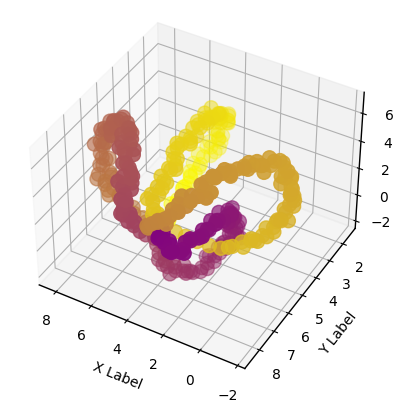

In [14]:
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#embedding_mean=np.load(Input_folder+'Embedding_example_ABCD_08042024_1321.npy')

x = embedding_mean_pertask[:,0]
y = embedding_mean_pertask[:,1]
z = embedding_mean_pertask[:,2]

ax.scatter(x, y, z, c=colors_state, marker='o',s=100)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.azim = 120 ## rotate around z axis
ax.elev = 40 ##angle between eye and xy plane (i.e. 0 = looking from side, 90= looking from top)
plt.savefig(Output_folder+'UMAP_withintask_state.svg',\
                bbox_inches = 'tight', pad_inches = 0)
plt.show()

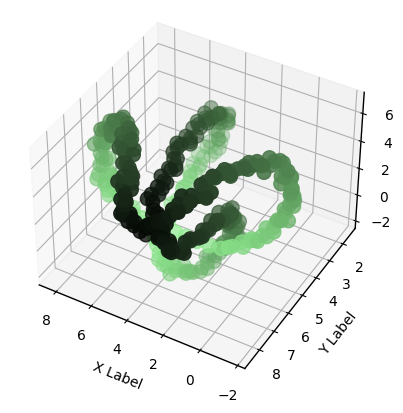

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#embedding_mean=np.load(Input_folder+'Embedding_example_ABCD_08042024_1321.npy')

x = embedding_mean_pertask[:,0]
y = embedding_mean_pertask[:,1]
z = embedding_mean_pertask[:,2]

ax.scatter(x, y, z, c=colors_phase, marker='o',s=100)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.azim = 120 ## rotate around z axis
ax.elev = 40 ##angle between eye and xy plane (i.e. 0 = looking from side, 90= looking from top)
plt.savefig(Output_folder+'UMAP_withintask_phase.svg',\
                bbox_inches = 'tight', pad_inches = 0)
plt.show()




In [16]:
##UMAP embedding - per task distances between states within and between goal-progress

reducer = umap.UMAP(n_components = 3, metric = 'cosine', n_neighbors = 50, min_dist = 0.6)
distance_mean_perday_all=[]
distance_mean_perday_crossphase_all=[]

distance_all_perday_all=[]
distance_all_perday_crossphase_all=[]
for mouse_recday in ephys_mean_z_dic.keys():
    print(mouse_recday)
    ephys_mean_z_pertask_day=ephys_mean_z_pertask_dic[mouse_recday]
    if len(ephys_mean_z_pertask_day)==0:
        print('not used')
        continue
    embedding_mean_pertask_perday = reducer.fit_transform(ephys_mean_z_pertask_day.T)
    
    embedding_mean_pertask_perstate_perday=np.asarray([embedding_mean_pertask_perday[state_ind*90:(state_ind+1)*90]\
                                            for state_ind in range(int(num_states))])
    distances_all_perday=[]
    distances_all_perday_crossphase=[]
    for state_ind_X in np.arange(int(num_states)):
        for state_ind_Y in np.arange(int(num_states)):
            if state_ind_X!=state_ind_Y:
                distance_XY_=np.linalg.norm(embedding_mean_pertask_perstate_perday[state_ind_X]\
                                            -embedding_mean_pertask_perstate_perday[state_ind_Y],axis=1)
                
                
                distance_XY_crossphase_=np.linalg.norm(embedding_mean_pertask_perstate_perday[state_ind_X]\
                        -np.roll(embedding_mean_pertask_perstate_perday[state_ind_Y],45,axis=0),axis=1)

                
                distances_all_perday.append(distance_XY_)
                distances_all_perday_crossphase.append(distance_XY_crossphase_)
    distance_mean_perday=np.nanmean(distances_all_perday)
    distance_all_perday_all.append(distances_all_perday)
    distance_mean_perday_all.append(distance_mean_perday)
    
    distance_mean_perday_crossphase=np.nanmean(distances_all_perday_crossphase)
    distance_all_perday_crossphase_all.append(distances_all_perday_crossphase)
    distance_mean_perday_crossphase_all.append(distance_mean_perday_crossphase)
    
distance_mean_perday_all=np.vstack((distance_mean_perday_all))
distance_mean_perday_crossphase_all=np.vstack((distance_mean_perday_crossphase_all))


ab03_01092023_02092023
ab03_05092023_06092023
ab03_29082023_30082023
ah03_12082021_13082021
ah03_18082021_19082021
ah04_01122021_02122021
ah04_05122021_06122021
ah04_07122021_08122021
ah04_09122021_10122021
ah04_14122021_16122021
ah07_01092023_02092023
ah07_27082023_28082023
ah07_29082023_30082023
me08_06092021_09092021
me10_09122021_10122021
me11_01122021_02122021
me11_05122021_06122021
me11_07122021_08122021
me11_09122021_10122021
me11_12122021_13122021


In [17]:
tt=time.time()

num_iterations=len(ephys_mean_z_shuff_all_alliterations)
distance_mean_shuff_all=np.zeros(num_iterations)
distance_mean_shuff_all[:]=np.nan
for iteration in range(num_iterations):
    print(iteration)
    
    ##UMAP embedding
    ephys_mean_z_shuff_iteration=ephys_mean_z_shuff_all_alliterations[iteration]
    reducer = umap.UMAP(n_components = 3, metric = 'cosine', n_neighbors = 50, min_dist = 0.6)
    embedding_mean_pertask_shuff = reducer.fit_transform(ephys_mean_z_shuff_iteration.T)
    
    embedding_mean_pertask_perstate_shuff=np.asarray([embedding_mean_pertask_shuff[state_ind*90:(state_ind+1)*90]\
                                            for state_ind in range(int(num_states))])
    
    distances_all_iteration=[]
    for state_ind_X in np.arange(int(num_states)):
        for state_ind_Y in np.arange(int(num_states)):
            if state_ind_X!=state_ind_Y:
                distance_XY_=np.linalg.norm(embedding_mean_pertask_perstate_shuff[state_ind_X]\
                                            -embedding_mean_pertask_perstate_shuff[state_ind_Y],axis=1)
                distances_all_iteration.append(distance_XY_)
    distance_mean_iteration=np.nanmean(distances_all_iteration)
    distance_mean_shuff_all[iteration]=distance_mean_iteration
    
print(time.time()-tt)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
226.39856696128845


In [18]:
##UMAP embedding - shuffled data - per task distances between states within and between goal-progress
tt=time.time()

num_iterations_=5
distance_mean_shuff_all=np.zeros(len(list(ephys_mean_z_shuff_dic[0].keys())))
distance_mean_shuff_all[:]=np.nan

for day_ind, mouse_recday in enumerate(list(ephys_mean_z_shuff_dic[0].keys())):
    print(mouse_recday)
    distance_mean_iteration_day=[]
    for iteration in range(num_iterations_):
        print(iteration)


        ##UMAP embedding
        ephys_mean_z_shuff_iteration=ephys_mean_z_shuff_dic[iteration][mouse_recday]
        reducer = umap.UMAP(n_components = 3, metric = 'cosine', n_neighbors = 50, min_dist = 0.6)
        if len(ephys_mean_z_shuff_iteration)==0:
            continue
        embedding_mean_pertask_shuff = reducer.fit_transform(ephys_mean_z_shuff_iteration.T)

        embedding_mean_pertask_perstate_shuff=np.asarray([embedding_mean_pertask_shuff[state_ind*90:(state_ind+1)*90]\
                                                for state_ind in range(int(num_states))])

        distances_all_iteration=[]
        for state_ind_X in np.arange(int(num_states)):
            for state_ind_Y in np.arange(int(num_states)):
                if state_ind_X!=state_ind_Y:
                    distance_XY_=np.linalg.norm(embedding_mean_pertask_perstate_shuff[state_ind_X]\
                                                -embedding_mean_pertask_perstate_shuff[state_ind_Y],axis=1)
                    distances_all_iteration.append(distance_XY_)
        distance_mean_iteration=np.nanmean(distances_all_iteration)
        distance_mean_iteration_day.append(distance_mean_iteration)
    distance_mean_shuff_all[day_ind]=np.nanmean(distance_mean_iteration_day)
    
print(time.time()-tt)

ab03_01092023_02092023
0
1
2
3
4
ab03_05092023_06092023
0
1
2
3
4
ab03_29082023_30082023
0
1
2
3
4
ah03_12082021_13082021
0
1
2
3
4
ah03_18082021_19082021
0
1
2
3
4
ah04_01122021_02122021
0
1
2
3
4
ah04_05122021_06122021
0
1
2
3
4
ah04_07122021_08122021
0
1
2
3
4
ah04_09122021_10122021
0
1
2
3
4
ah04_14122021_16122021
0
1
2
3
4
ah07_01092023_02092023
0
1
2
3
4
ah07_27082023_28082023
0
1
2
3
4
ah07_29082023_30082023
0
1
2
3
4
me08_06092021_09092021
0
1
2
3
4
me10_09122021_10122021
0
1
2
3
4
me10_17122021_19122021
0
1
2
3
4
me10_20122021_21122021
0
1
2
3
4
me11_01122021_02122021
0
1
2
3
4
me11_05122021_06122021
0
1
2
3
4
me11_07122021_08122021
0
1
2
3
4
me11_09122021_10122021
0
1
2
3
4
me11_12122021_13122021
0
1
2
3
4
265.5830295085907


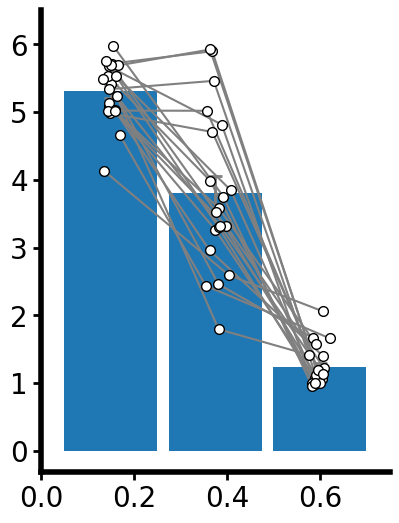

TtestResult(statistic=6.276286629607817, pvalue=5.019243638114379e-06, df=19)
TtestResult(statistic=26.116385370782357, pvalue=2.375173862102143e-16, df=19)
TtestResult(statistic=8.442163029183254, pvalue=7.469590458868544e-08, df=19)
(array([ True,  True,  True]), array([1.50577309e-05, 7.12552159e-16, 2.24087714e-07]), 0.016952427508441503, 0.016666666666666666)


In [21]:
##Within task between state - ABCD
distance_mean_shuff_all_=[]
for day_ind, mouse_recday in enumerate(list(ephys_mean_z_shuff_dic[0].keys())):
    if len(ephys_mean_z_dic[mouse_recday])>0:
        distance_mean_shuff_all_.append(distance_mean_shuff_all[day_ind])        
        
distance_mean_shuff_all_=np.asarray(distance_mean_shuff_all_)
distances_=np.column_stack((distance_mean_perday_crossphase_all.squeeze(),distance_mean_perday_all.squeeze(),\
                              distance_mean_shuff_all_))

plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

bar_plotX(distances_.T,'none',0,6.2,'points','paired',0.025)

plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Output_folder+'UMAP_withintask_vs_shuffle_mean_statedistance.svg',\
                bbox_inches = 'tight', pad_inches = 0)
plt.show()
print(st.ttest_rel(distances_[:,0],distances_[:,1]))
print(st.ttest_rel(distances_[:,0],distances_[:,2]))
print(st.ttest_rel(distances_[:,1],distances_[:,2]))

from statsmodels.sandbox.stats.multicomp import multipletests
ttests_ps= [st.ttest_rel(distances_[:,0],distances_[:,1])[1], st.ttest_rel(distances_[:,0],distances_[:,2])[1],\
st.ttest_rel(distances_[:,1],distances_[:,2])[1]]

print(multipletests(ttests_ps,alpha=0.05,method='bonferroni'))